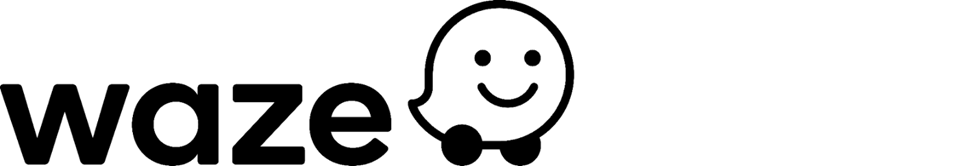


# Project goal: 

Waze leadership has asked your data team to develop a machine learning model to predict user churn. An accurate model will help prevent churn, improve user retention, and grow Waze’s business.

# Background: 

Waze’s free navigation app makes it easier for drivers around the world to get to where they want to go. Waze’s community of map editors, beta testers, translators, partners, and users helps make each drive better and safer. 

# Scenario: 

Your team is about to start a new project to help prevent user churn on the Waze app. Churn quantifies the number of users who have uninstalled the Waze app or stopped using the app. This project focuses on monthly user churn.

The subject of this Case Study is to answer the following questions:

- Who are the users who most likely churn?

- Why do users churn?

- When do users churn?


# Note:
 The story, all names, characters, and incidents portrayed in this project are fictitious. No identification with actual persons (living or deceased) is intended or should be inferred. And, the data shared in this project has been created for pedagogical purposes.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
pd.set_option('display.Max_columns',None)

In [2]:
df=pd.read_csv('waze_dataset.csv')

In [3]:
df.shape

(14999, 13)

In [4]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [6]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [5]:
df['label'].value_counts(dropna=False)

label
retained    11763
churned      2536
NaN           700
Name: count, dtype: int64

In [6]:
df.isnull().sum() #to check null values

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

In [7]:
# Isolate rows with null values
df_null = df[df["label"].isnull()]
# Display summary stats of rows with null values
df_null.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,7405.584286,80.837143,67.798571,198.483348,1709.295714,118.717143,30.371429,3935.967029,1795.123358,15.382857,12.125714
std,4306.900234,79.987440,65.271926,140.561715,1005.306562,156.308140,46.306984,2443.107121,1419.242246,8.772714,7.626373
min,77.000000,0.000000,0.000000,5.582648,16.000000,0.000000,0.000000,290.119811,66.588493,0.000000,0.000000
25%,3744.500000,23.000000,20.000000,94.056340,869.000000,4.000000,0.000000,2119.344818,779.009271,8.000000,6.000000
50%,7443.000000,56.000000,47.500000,177.255925,1650.500000,62.500000,10.000000,3421.156721,1414.966279,15.000000,12.000000
75%,11007.000000,112.250000,94.000000,266.058022,2508.750000,169.250000,43.000000,5166.097373,2443.955404,23.000000,18.000000
max,14993.000000,556.000000,445.000000,1076.879741,3498.000000,1096.000000,352.000000,15135.391280,9746.253023,31.000000,30.000000


In [8]:
# Isolate rows without null values
df_non_null = df[~df["label"].isnull()]
# Display summary stats of rows without null values
df_non_null.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,7503.573117,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,4331.207621,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


Comparing summary statistics of the observations with missing retention labels to those that aren't missing any values reveals nothing remarkable. The means and standard deviations are fairly consistent between the two groups.

In [9]:
# Get count of null values by device
df_null["device"].value_counts()

device
iPhone     447
Android    253
Name: count, dtype: int64

In [10]:
# Calculate % of iPhone nulls and Android nulls
df_null["device"].value_counts(normalize = True)

device
iPhone     0.638571
Android    0.361429
Name: proportion, dtype: float64

In [11]:
# Calculate % of iPhone users and Android users in full dataset
df["device"].value_counts(normalize= True)

device
iPhone     0.644843
Android    0.355157
Name: proportion, dtype: float64

The percentage of missing values by each device is consistent with their representation in the data overall.

There is nothing to suggest a non-random cause of the missing data.

In [12]:
# Calculate counts of churned vs. retained
print(df["label"].value_counts())
print()
print(df["label"].value_counts(normalize=True))

label
retained    11763
churned      2536
Name: count, dtype: int64

label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64


This dataset contains 82% retained users and 18% churned users. The imbalance rate of the dataset is acceptable.

Next, compare the medians of each variable for churned and retained users. The reason for calculating the median and not the mean is to prevent outliers from unduly affecting the portrayal of a typical user. Notice, for example, that the maximum value in the driven_km_drives column is 21,183 km. That's more than half the circumference of the Earth!

In [13]:
df.groupby('label').median(numeric_only=True)

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
label,,,,,,,,,,,
churned,7477.5,59.0,50.0,164.339042,1321.0,84.5,11.0,3652.655666,1607.183785,8.0,6.0
retained,7509.0,56.0,47.0,157.586756,1843.0,68.0,9.0,3464.684614,1458.046141,17.0,14.0


-   Users who churned averaged approximately three more drives in the last month than retained users, but retained users used the app on more than twice as many days as churned users in the same time period.

-   The median churned user drove approximately 200 more kilometers and 2.5 more hours during the last month than the median retained user.

-   It seems that churned users had more drives in fewer days, and their trips were farther and longer in duration. This could be suggestive of a user profile.

Calculate the median kilometers per drive in the last month for both retained and churned users.

In [14]:
# Group data by `label` and calculate the medians
medians_by_label = df.groupby("label").median(numeric_only=True)
# Divide the median distance by median number of drives
medians_by_label["driven_km_drives"] / medians_by_label["drives"]

label
churned     73.053113
retained    73.716694
dtype: float64

The median user from both groups drove ~73 km/drive. How many kilometers per driving day was this?

In [15]:
# Divide the median distance by median number of driving days
print("Median kilometers per driving day:")
medians_by_label["driven_km_drives"] / medians_by_label["driving_days"]

Median kilometers per driving day:


label
churned     608.775944
retained    247.477472
dtype: float64

Now, calculate the median number of drives per driving day for each group.

In [16]:
# Divide the median number of drives by median number of driving days
print("Median drives per driving day:")
medians_by_label["drives"] / medians_by_label["driving_days"]

Median drives per driving day:


label
churned     8.333333
retained    3.357143
dtype: float64

The median user who churned drove 608 kilometers each day they drove last month, which is almost 250% of the per-drive-day distance of retained users. The median churned user had a similarly disproportionate number of drives per drive day compared to retained users.

It is clear from these figures that, regardless of whether a user churned or not, the users represented in this data are serious drivers! It would probably be safe to assume that this data does not represent typical drivers at large. Perhaps the data—and in particular the sample of churned users—contains a high proportion of long-haul truckers.

In consideration of how much these users drive, it would be worthwhile to recommend to Waze that they gather more data on these super-drivers. It's possible that the reason for their driving so much is also the reason why the Waze app does not meet their specific set of needs, which may differ from the needs of a more typical driver, such as a commuter.

In [17]:
# For each label, calculate the number of Android users and iPhone users
df.groupby(["label", "device"]).size()

label     device 
churned   Android     891
          iPhone     1645
retained  Android    4183
          iPhone     7580
dtype: int64

In [18]:
# For each label, calculate the percentage of Android users and iPhone users
df.groupby("label")["device"].value_counts(normalize=True)

label     device 
churned   iPhone     0.648659
          Android    0.351341
retained  iPhone     0.644393
          Android    0.355607
Name: proportion, dtype: float64

The ratio of iPhone users to Android users is consistent between the churned group and the retained group, and those ratios are both consistent with the ratio found in the overall dataset.

#  Conclusion


**Questions:**

1. Did the data contain any missing values? How many, and which variables were affected? Was there a pattern to the missing data?
    * There are 700 missing values in the label columns. There is no obvious pattern for the missing data.


2. What is a benefit of using the median value of a sample instead of the mean?

    * The mean value might be affected by extreme values, whereas the median value will only focus around the middle value.


3. Did your investigation give rise to further questions that you would like to explore or ask the Waze team about?
    *   It seems like there are some unusual data in our results. For example, median drivers on driving days—churned users are driving much more than retained users. Shouldn't it be the opposite?



4. What percentage of the users in the dataset were Android users and what percentage were iPhone users?
    * iPhone users make up about 64%, and Android users about 35%.



5. What were some distinguishing characteristics of users who churned vs. users who were retained?
    * Churning users have a higher median number of drives per driving day, which is indeed interesting and may seem counterintuitive at first glance. Based on this analysis, I can't tell why.



6. Was there an appreciable difference in churn rate between iPhone users vs. Android users?
    * No, there are no major differences; they are almost the same.



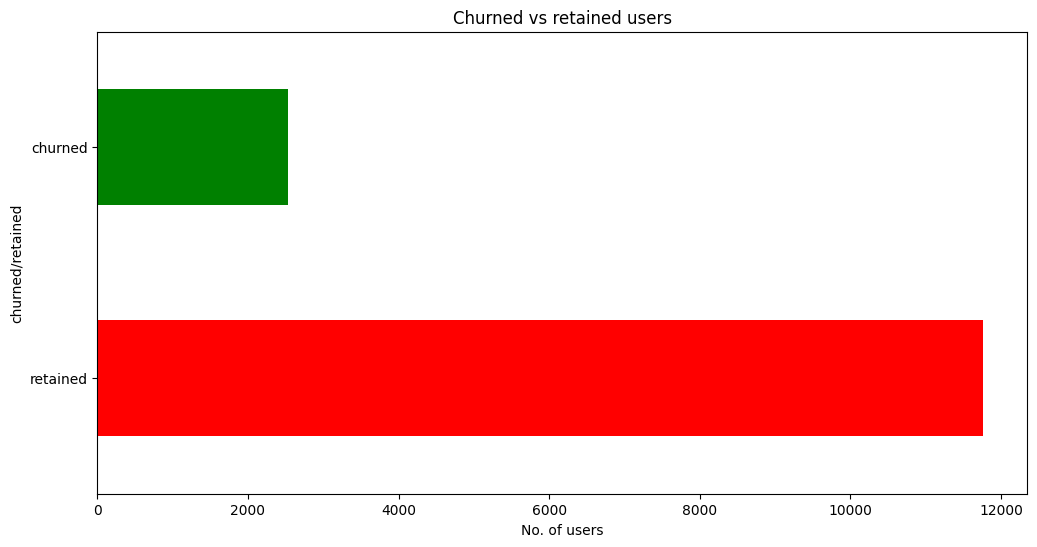

In [56]:
plt.figure(figsize=(12,6))

graph = df['label'].value_counts().plot(kind='barh',color=['r','g'])

plt.title('Churned vs retained users')
plt.xlabel('No. of users')
plt.ylabel('churned/retained')

plt.show()

- The dataset has 700 missing values in the label column. There was no obvious pattern to the missing values.
- The median user who churned drove 698 kilometers each day they drove last month, which is about 240% the per-drive-day distance of retained users. It would be helpful to know how this data was collected and if it represents a non-random sample of users.
Android users comprised approximately 36% of the sample, while iPhone users made up about 64%
Generally, users who churned drove farther and longer in fewer days than retained users. They also used the app about half as many times as retained users over the same period.
- The churn rate for both iPhone and Android users was within one percentage point of each other. There is nothing suggestive of churn being correlated with device.

# Exploratory data analysis

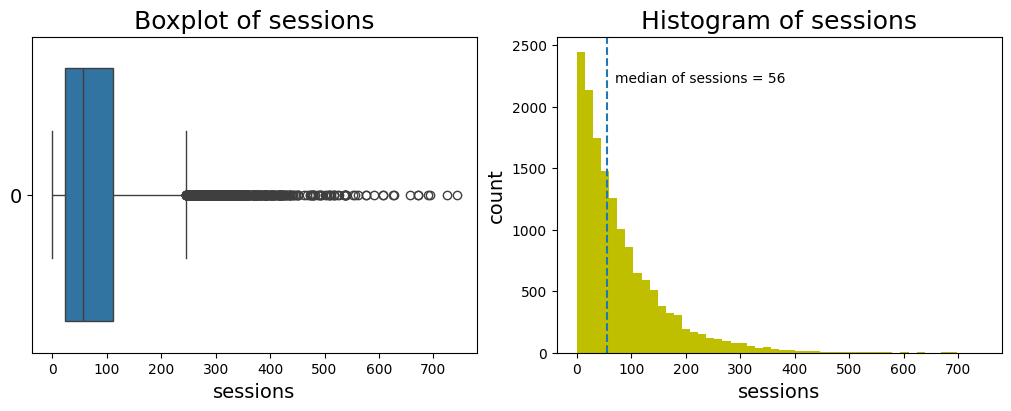

In [54]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)

# Boxplot
sns.boxplot(data=df, x='sessions', ax=ax1)
ax1.set_xlabel("sessions", fontsize=14)
ax1.set_title('Boxplot of sessions', fontsize=18)
ax1.set_yticks(ax1.get_yticks())  # Ensure ticks are set first
ax1.set_yticklabels(ax1.get_yticks(), size=14)

# Histogram
median_sessions = np.median(df['sessions'])
ax2.hist(df['sessions'], bins=50, color='y')
ax2.axvline(median_sessions, ls="--", label="Median hour")
ax2.set_xlabel('sessions', fontsize=14)
ax2.set_ylabel('count', fontsize=14)
ax2.text(70, 2200, 'median of sessions = 56')
ax2.set_title('Histogram of sessions', fontsize=18)

plt.show()


- The sessions variable is a right-skewed distribution with half of the observations having 56 or fewer sessions. However, as indicated by the boxplot, some users have more than 700.

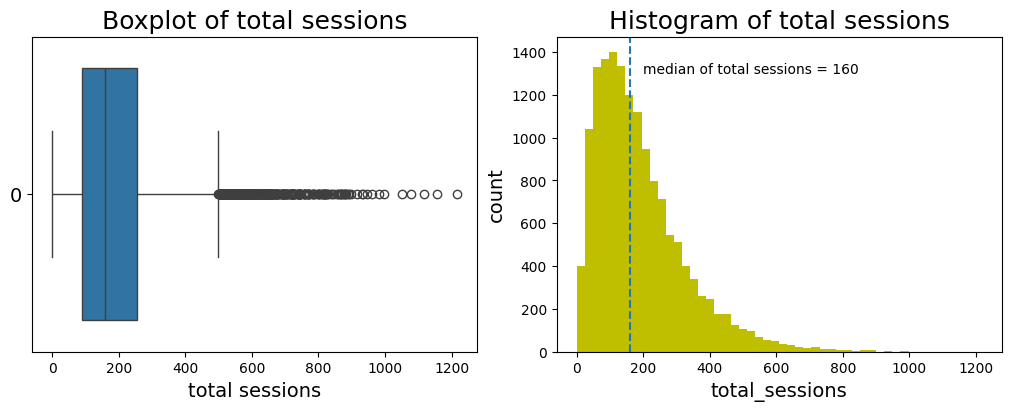

In [45]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4),constrained_layout = True)

ax1 = sns.boxplot(data=df,x='total_sessions',ax=ax1)
ax1.set_xlabel("total sessions",fontsize=14)
ax1.set_title('Boxplot of total sessions',fontsize=18)
ax1.set_yticks(ax1.get_yticks())  # Ensure ticks are set first
ax1.set_yticklabels(ax1.get_yticks(),size=14)

median_sessions = np.median(df['total_sessions'])
ax2 = plt.hist(df['total_sessions'],bins=50,color='y')
plt.axvline(median_sessions,ls="--",label="Median hour")
plt.xlabel('total_sessions',fontsize=14)
plt.ylabel('count',fontsize=14)
plt.text(200,1300,'median of total sessions = 160')
plt.title('Histogram of total sessions',fontsize=18);

- The total_sessions is a right-skewed distribution. The median total number of sessions is 159.6. This is interesting information because, if the median number of sessions in the last month was 56 and the median total sessions was ~160, then it seems that a large proportion of a user's (estimated) total drives might have taken place in the last month. This is something you can examine more closely later.

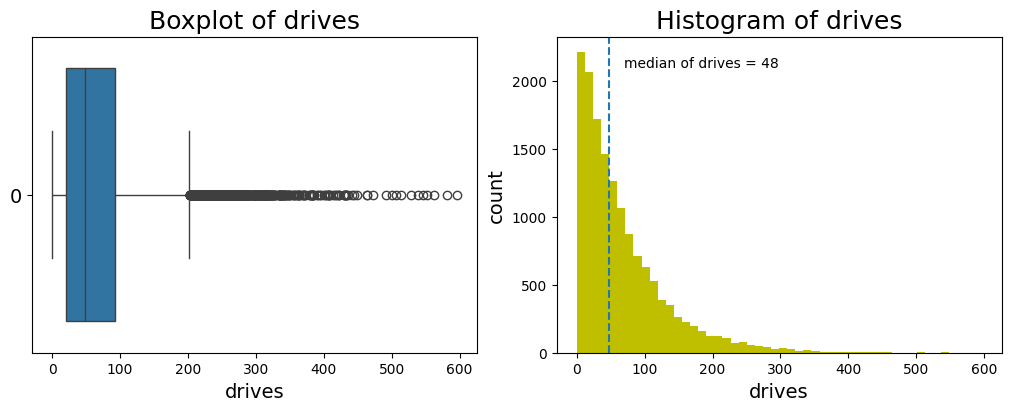

In [53]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4),constrained_layout = True)

ax1 = sns.boxplot(data=df,x='drives',ax=ax1)
ax1.set_xlabel("drives",fontsize=14)
ax1.set_title('Boxplot of drives',fontsize=18)
ax1.set_yticks(ax1.get_yticks())  # Ensure ticks are set first
ax1.set_yticklabels(ax1.get_yticks(),size=14)

median_drives = np.median(df['drives'])
ax2 = plt.hist(df['drives'],bins=50,color='y')
plt.axvline(median_drives,ls="--",label="Median hour")
plt.xlabel('drives',fontsize=14)
plt.ylabel('count',fontsize=14)
plt.text(70,2100,'median of drives = 48')
plt.title('Histogram of drives',fontsize=18);

- The drives information follows a distribution similar to the sessions variable. It is right-skewed, approximately log-normal, with a median of 48. However, some drivers had over 400 drives in the last month.

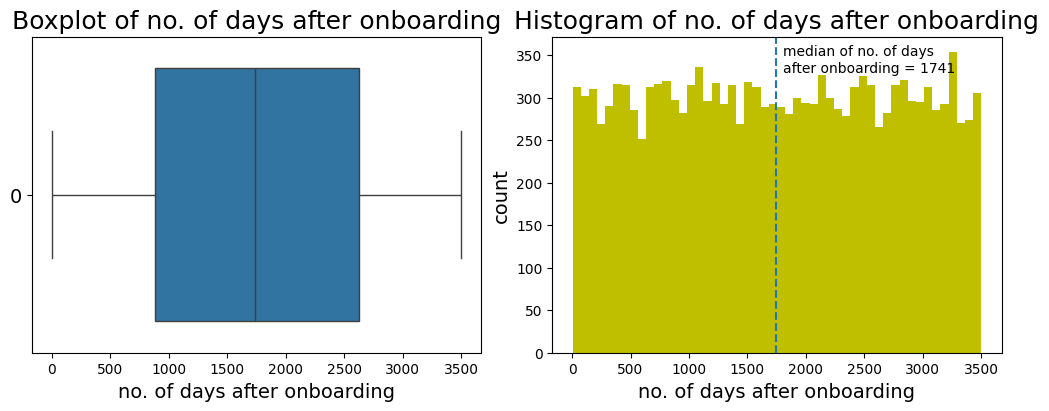

In [52]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4),constrained_layout = True)

ax1 = sns.boxplot(data=df,x='n_days_after_onboarding',ax=ax1)
ax1.set_xlabel("no. of days after onboarding",fontsize=14)
ax1.set_title('Boxplot of no. of days after onboarding',fontsize=18)
ax1.set_yticks(ax1.get_yticks())  # Ensure ticks are set first
ax1.set_yticklabels(ax1.get_yticks(),size=14)

median_onboard = np.median(df['n_days_after_onboarding'])
ax2 = plt.hist(df['n_days_after_onboarding'],bins=50,color='y')
plt.axvline(median_onboard,ls="--",label="Median hour")
plt.xlabel('no. of days after onboarding',fontsize=14)
plt.ylabel('count',fontsize=14)
plt.text(1800,350,'median of no. of days')
plt.text(1800,330,'after onboarding = 1741')
plt.title('Histogram of no. of days after onboarding',fontsize=18);

- Number of days since onboarding is a uniform distribution with values ranging from near-zero to ~3,500 (~9.5 years).

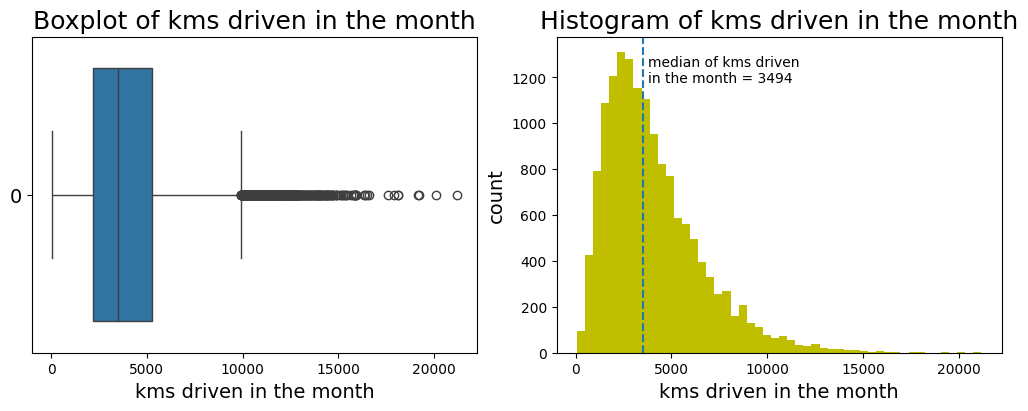

In [51]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4),constrained_layout = True)

ax1 = sns.boxplot(data=df,x='driven_km_drives',ax=ax1)
ax1.set_xlabel("kms driven in the month",fontsize=14)
ax1.set_title('Boxplot of kms driven in the month',fontsize=18)
ax1.set_yticks(ax1.get_yticks())
ax1.set_yticklabels(ax1.get_yticks(),size=14)

median_kms = np.median(df['driven_km_drives'])
ax2 = plt.hist(df['driven_km_drives'],bins=50,color='y')
plt.axvline(median_kms,ls="--",label="Median hour")
plt.xlabel('kms driven in the month',fontsize=14)
plt.ylabel('count',fontsize=14)
plt.text(3800,1250,'median of kms driven')
plt.text(3800,1180,'in the month = 3494')
plt.title('Histogram of kms driven in the month',fontsize=18);

- The number of drives driven in the last month per user is a right-skewed distribution with half the users driving under 3,495 kilometers. As you discovered in the analysis from the previous course, the users in this dataset drive a lot. The longest distance driven in the month was over half the circumferene of the earth.

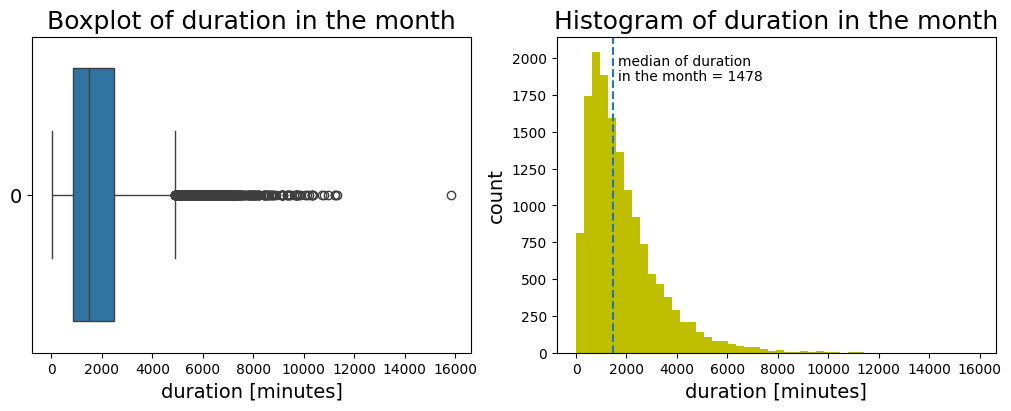

In [50]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4),constrained_layout = True)

ax1 = sns.boxplot(data=df,x='duration_minutes_drives',ax=ax1)
ax1.set_xlabel("duration [minutes]",fontsize=14)
ax1.set_title('Boxplot of duration in the month',fontsize=18)
ax1.set_yticks(ax1.get_yticks())
ax1.set_yticklabels(ax1.get_yticks(),size=14)

median_durmins = np.median(df['duration_minutes_drives'])
ax2 = plt.hist(df['duration_minutes_drives'],bins=50,color='y')
plt.axvline(median_durmins,ls="--",label="Median hour")
plt.xlabel('duration [minutes]',fontsize=14)
plt.ylabel('count',fontsize=14)
plt.text(1650,1950,'median of duration')
plt.text(1650,1850,'in the month = 1478')
plt.title('Histogram of duration in the month',fontsize=18);

- The duration_minutes_drives variable has a heavily skewed right tail. Half of the users drove less than ~1,478 minutes (~25 hours), but some users clocked over 250 hours over the month.

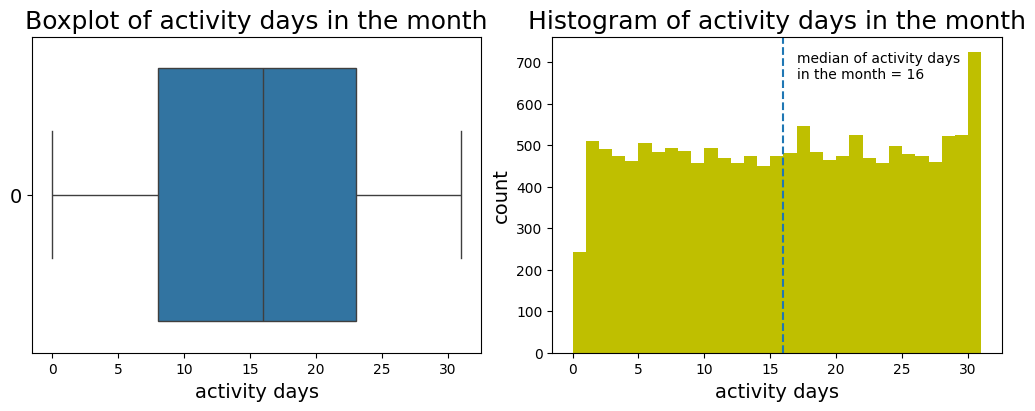

In [49]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4),constrained_layout = True)

ax1 = sns.boxplot(data=df,x='activity_days',ax=ax1)
ax1.set_xlabel("activity days",fontsize=14)
ax1.set_title('Boxplot of activity days in the month',fontsize=18)
ax1.set_yticks(ax1.get_yticks())
ax1.set_yticklabels(ax1.get_yticks(),size=14)

median_actdays = np.median(df['activity_days'])
ax2 = plt.hist(df['activity_days'],bins=31,color='y')
plt.axvline(median_actdays,ls="--",label="Median hour")
plt.xlabel('activity days',fontsize=14)
plt.ylabel('count',fontsize=14)
plt.text(17,700,'median of activity days')
plt.text(17,660,'in the month = 16')
plt.title('Histogram of activity days in the month',fontsize=18);

- Within the last month, users opened the app a median of 16 times. The box plot reveals a centered distribution. The histogram shows a nearly uniform distribution of ~500 people opening the app on each count of days. However, there are ~250 people who didn't open the app at all and ~250 people who opened the app every day of the month.

- This distribution is noteworthy because it does not mirror the sessions distribution, which you might think would be closely correlated with activity_days.

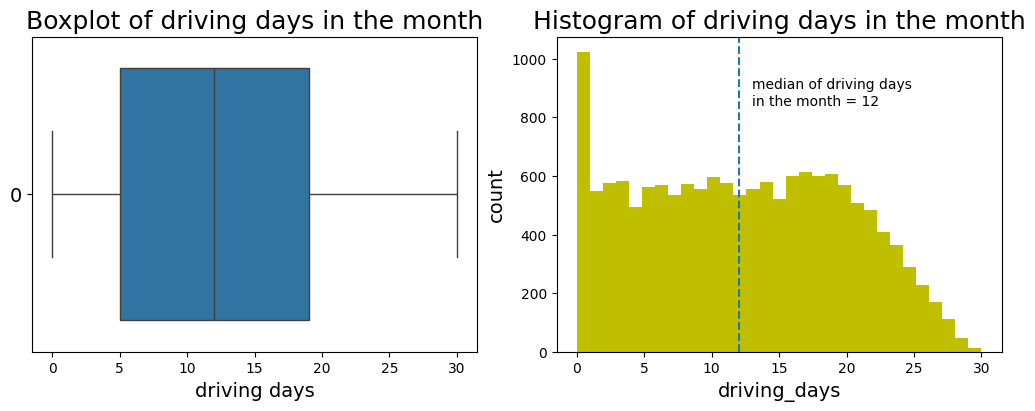

In [48]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4),constrained_layout = True)

ax1 = sns.boxplot(data=df,x='driving_days',ax=ax1)
ax1.set_xlabel("driving days",fontsize=14)
ax1.set_title('Boxplot of driving days in the month',fontsize=18)
ax1.set_yticks(ax1.get_yticks())
ax1.set_yticklabels(ax1.get_yticks(),size=14)

median_drdays = np.median(df['driving_days'])
ax2 = plt.hist(df['driving_days'],bins=31,color='y')
plt.axvline(median_drdays,ls="--",label="Median hour")
plt.xlabel('driving_days',fontsize=14)
plt.ylabel('count',fontsize=14)
plt.text(13,900,'median of driving days')
plt.text(13,840,'in the month = 12')
plt.title('Histogram of driving days in the month',fontsize=18);

- The number of days users drove each month is almost uniform, and it largely correlates with the number of days they opened the app that month, except the driving_days distribution tails off on the right.
However, there were almost twice as many users (~1,000 vs. ~550) who did not drive at all during the month. 

- This might seem counterintuitive when considered together with the information from activity_days. That variable had ~500 users opening the app on each of most of the day counts, but there were only ~250 users who did not open the app at all during the month and ~250 users who opened the app every day. Flag this for further investigation later.

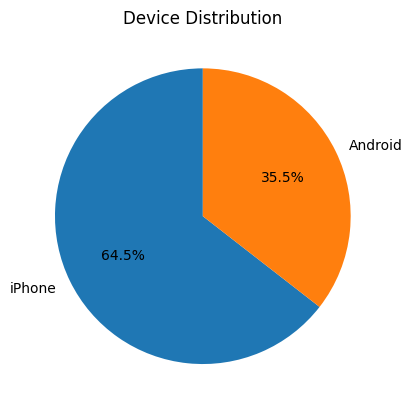

In [58]:
device_counts = df['device'].value_counts()
plt.figure()
device_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Device Distribution')
plt.ylabel('')  # Hide the y-label
plt.show()

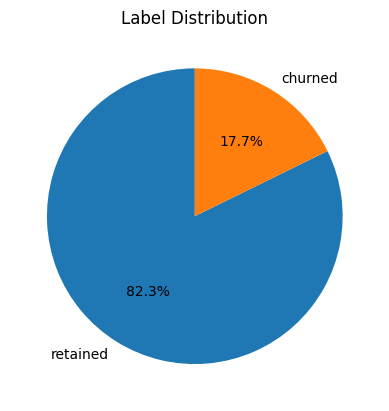

In [80]:
# Obtaining the number of labels.
label_number = df["label"].value_counts()
plt.figure()
label_number.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Label Distribution')
plt.ylabel('')  # Hide the y-label
plt.show()


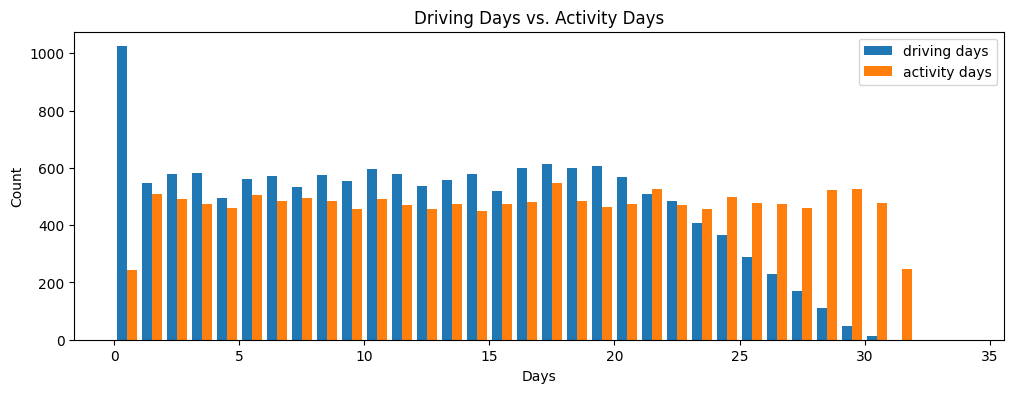

In [84]:
plt.figure(figsize = (12,4))

# Creating a label for both variables.
label = ["driving days", "activity days"]

# Histogram of the "driving days" and "activity_days" variables.
plt.hist( x = [df["driving_days"], df["activity_days"]], bins = range(0,35), label = label)

plt.xlabel("Days")
plt.ylabel("Count")
plt.legend()
plt.title("Driving Days vs. Activity Days")
plt.show()

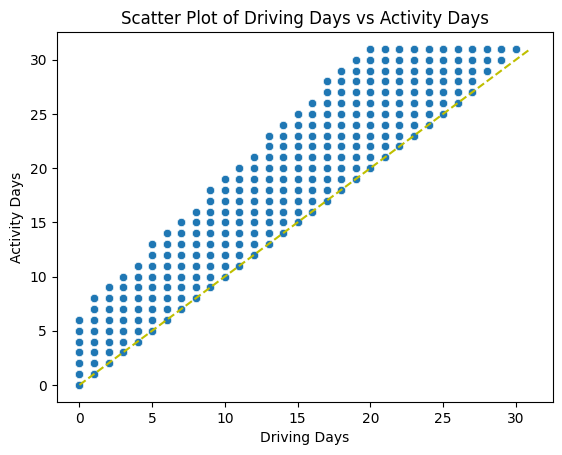

In [86]:
# Scatter plot of the variables "driving_days" and "activity_days".
sns.scatterplot(data=df, x = "driving_days", y = "activity_days")

plt.title("Scatter Plot of Driving Days vs Activity Days")
plt.xlabel("Driving Days")
plt.ylabel("Activity Days")
plt.plot([0,31],[0,31],color='y',linestyle='--');
plt.show()

- As observed previously, this might seem counterintuitive. After all, why are there fewer people who didn't use the app at all during the month and more people who didn't drive at all during the month?


- On the other hand, it could just be illustrative of the fact that, while these variables are related to each other, they're not the same. People probably just open the app more than they use the app to drive—perhaps to check drive times or route information, to update settings, or even just by mistake.


- Nonetheless, it might be worthwile to contact the data team at Waze to get more information about this, especially because it seems that the number of days in the month is not the same between variables.


- Notice that there is a theoretical limit. If you use the app to drive, then by definition it must count as a day-use as well. In other words, you cannot have more drive-days than activity-days. None of the samples in this data violate this rule, which is good.

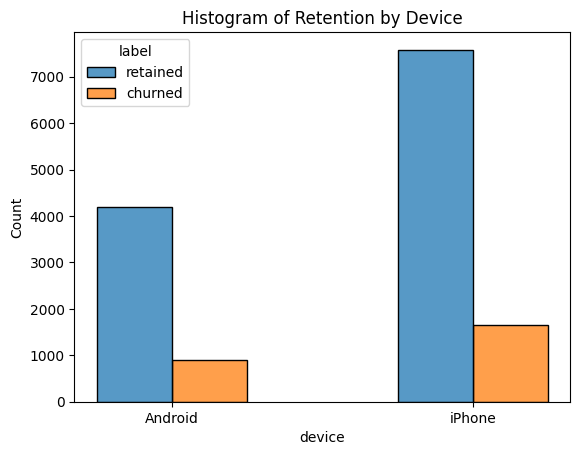

In [65]:
# Histogram of the "device" and "label" combination
sns.histplot(data = df, x = "device", hue = "label", multiple = "dodge", shrink = 0.5)

plt.title("Histogram of Retention by Device")
plt.show()

In [22]:
df["km_per_driving_day"].describe()

c:\Users\NIMO\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

In [21]:
#Introducing new features
df["km_per_drive"] = df["driven_km_drives"] / df["drives"]

df["km_per_driving_day"] = df["driven_km_drives"] / df["driving_days"]

df["drives_per_driving_day"] = df["drives"] / df["driving_days"]

df['total_sessions_per_day'] = df['total_sessions'] / df['n_days_after_onboarding']

df['km_per_hour'] = df['driven_km_drives'] / (df['duration_minutes_drives'] / 60)

df["percent_sessions_in_last_month"] = df["sessions"] / df["total_sessions"]


In [50]:
df["driving_days"].min()

0

In [53]:
df['drives_per_driving_day']=df['drives_per_driving_day'].fillna(0)

In [74]:
# Converting infinite values to zero
df.loc[df["km_per_driving_day"] == np.inf, "km_per_driving_day"] = 0
df.loc[df['km_per_drive'] == np.inf, 'km_per_drive'] = 0
df.loc[df['drives_per_driving_day'] == np.inf, 'drives_per_driving_day'] = 0

# Confirming that it worked
df["km_per_driving_day"].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

-   Some of the variables contain outliers and most variables were right-skewed, while some exhibited uniform distribution but the data generally appeared to be of high quality, with no significant issues affecting variables like driven_km_drives.

# Impute outliers


In [24]:
outliers_cols = ["sessions", "drives", "total_navigations_fav2", "driven_km_drives", "duration_minutes_drives",
                 "total_sessions", "total_navigations_fav1", ]

def outliers(df, col):
    percentile = df[col].quantile(0.95)
    df.loc[df[col] > percentile, col] = percentile

    return df

for col in outliers_cols:
  df = outliers(df.copy(), col)

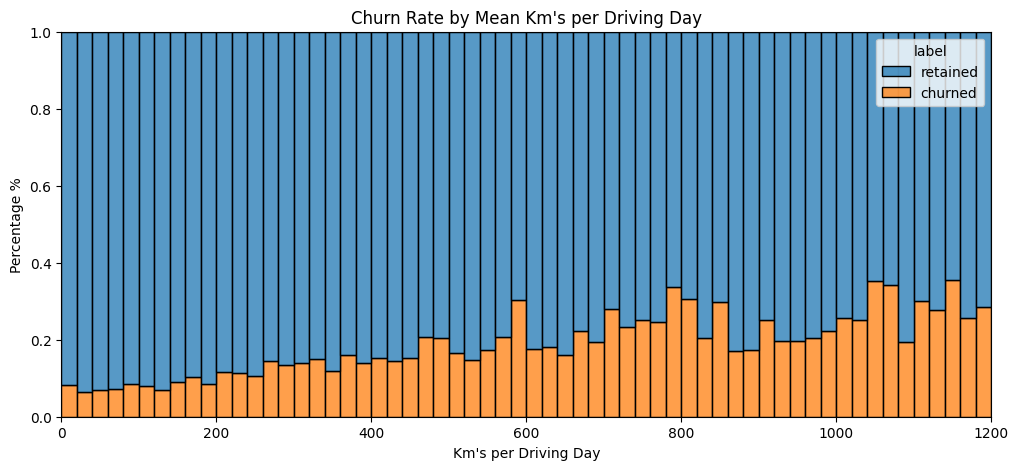

In [106]:
# Histogram of the new variable "km_per_driving_day" and the "label" variable.
plt.figure(figsize=(12,5))

sns.histplot(data = df, x = "km_per_driving_day", bins = range(0,1201,20), hue = "label", multiple = "fill")

plt.xlabel("Km's per Driving Day")
plt.ylabel("Percentage %")
plt.title("Churn Rate by Mean Km's per Driving Day")

plt.show()

- The churn rate tends to increase as the mean daily distance driven increases, confirming what was found in the previous course. It would be worth investigating further the reasons for long-distance users to discontinue using the app.

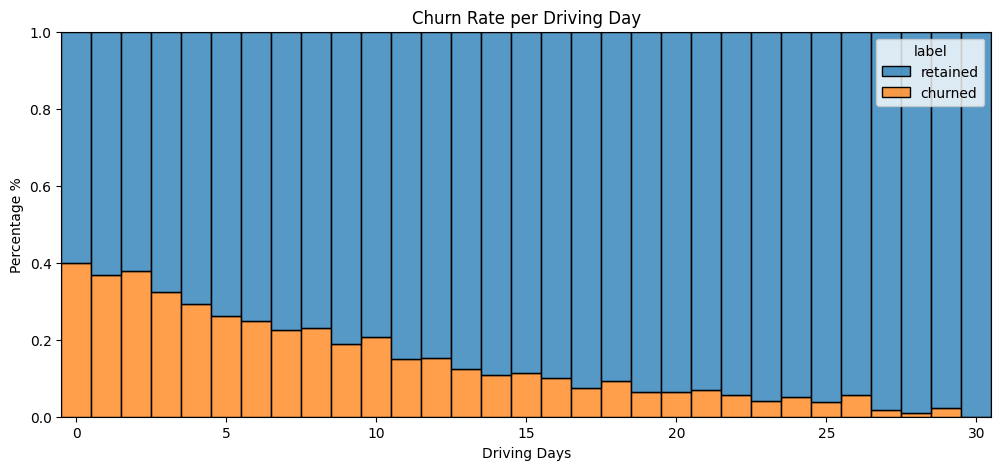

In [107]:
# Histogram of the variable "driving_days" and the "label" variable.
plt.figure(figsize=(12,5))

sns.histplot(data = df, x = "driving_days", bins = range(1,32), hue = "label", multiple = "fill", discrete = True)

plt.xlabel("Driving Days")
plt.ylabel("Percentage %")
plt.title("Churn Rate per Driving Day")

plt.show()

- The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

- This isn't surprising. If people who used the app a lot churned, it would likely indicate dissatisfaction. When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be indicative of a lesser need for a navigational app. Maybe they moved to a city with good public transportation and don't need to drive anymore.

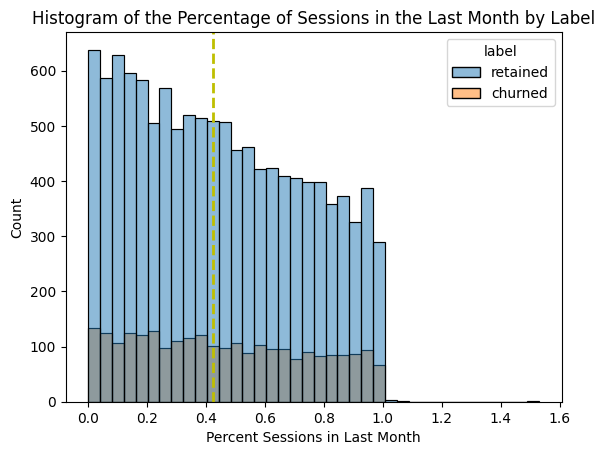

In [108]:
# Histogram of the "percent_sessions_in_last_month" variable.
sns.histplot(data=df, x = "percent_sessions_in_last_month", hue = df["label"], multiple = "layer")

# Assigning median calculation to use in the plot.
med_percent_sessions_in_last_month = df["percent_sessions_in_last_month"].median()

plt.axvline(x = med_percent_sessions_in_last_month, color = "y", linestyle = "dashed", linewidth = 2)
plt.title("Histogram of the Percentage of Sessions in the Last Month by Label")
plt.xlabel("Percent Sessions in Last Month")
plt.ylabel("Count")

plt.show()

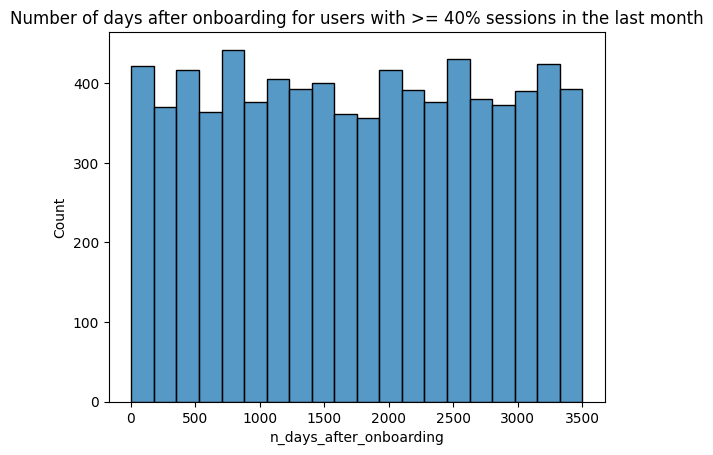

In [109]:
# Determining the percentage of people who had 40% or more of their sessions in the last month and assigning them to a new dataframe.
df_forty_percent_sessions_last_month = df.loc[df["percent_sessions_in_last_month"]>=0.4]

# Histogram of the "n_days_after_onboarding" variable just for the people who had 40% or more of their sessions in the last month.
sns.histplot(data=df, x = df_forty_percent_sessions_last_month["n_days_after_onboarding"])

plt.title("Number of days after onboarding for users with >= 40% sessions in the last month")
plt.show()

- The number of days since onboarding for users with 40% or more of their total sessions occurring in just the last month is a uniform distribution. This is very strange. It's worth asking Waze why so many long-time users suddenly used the app so much in the last month.

- Analysis revealed that the overall churn rate is ~17%, and that this rate is consistent between iPhone users and Android users.

- Perhaps you feel that the more deeply you explore the data, the more questions arise. This is not uncommon! In this case, it's worth asking the Waze data team why so many users used the app so much in just the last month.

- Also, EDA has revealed that users who drive very long distances on their driving days are more likely to churn, but users who drive more often are less likely to churn. The reason for this discrepancy is an opportunity for further investigation, and it would be something else to ask the Waze data team about.

- There is missing data in the user churn label, so we might need further data processing before further analysis.
There are many outlying observations for drives, so we might consider a variable transformation to stabilize the variation.
The number of drives and the number of sessions are both strongly correlated, so they might provide redundant information when we incorporate both in a model.
On average, retained users have fewer drives than churned users.

# Conclusion:
 
- What types of distributions did you notice in the variables? What did this tell you about the data?
Nearly all the variables were either very right-skewed or uniformly distributed. For the right-skewed distributions, this means that most users had values in the lower end of the range for that variable. For the uniform distributions, this means that users were generally equally likely to have values anywhere within the range for that variable.

- Was there anything that led you to believe the data was erroneous or problematic in any way?
Most of the data was not problematic, and there was no indication that any single variable was completely wrong. However, several variables had highly improbable or perhaps even impossible outlying values, such as driven_km_drives. Some of the monthly variables also might be problematic, such as activity_days and driving_days, because one has a max value of 31 while the other has a max value of 30, indicating that data collection might not have occurred in the same month for both of these variables.

- Did your investigation give rise to further questions that you would like to explore or ask the Waze team about?
Yes. I'd want to ask the Waze data team to confirm that the monthly variables were collected during the same month, given the fact that some have max values of 30 days while others have 31 days. I'd also want to learn why so many long-time users suddenly started using the app so much in just the last month. Was there anything that changed in the last month that might prompt this kind of behavior?

- What percentage of users churned and what percentage were retained?
Less than 18% of users churned, and ~82% were retained.

- What factors correlated with user churn? How?
Distance driven per driving day had a positive correlation with user churn. The farther a user drove on each driving day, the more likely they were to churn. On the other hand, number of driving days had a negative correlation with churn. Users who drove more days of the last month were less likely to churn.

- Did newer uses have greater representation in this dataset than users with longer tenure? How do you know?
No. Users of all tenures from brand new to ~10 years were relatively evenly represented in the data. This is borne out by the histogram for n_days_after_onboarding, which reveals a uniform distribution for this variable.

In [25]:
# Create `professional_driver` column
df['professional_driver'] = np.where((df['drives'] >= 60) & (df['driving_days'] >= 15), 1, 0)

In [26]:
# 1. Check count of professionals and non-professionals
print(df["professional_driver"].value_counts())

# 2. Check in-class churn rate
df.groupby(["professional_driver"])["label"].value_counts(normalize=True)

professional_driver
0    12405
1     2594
Name: count, dtype: int64


professional_driver  label   
0                    retained    0.801202
                     churned     0.198798
1                    retained    0.924437
                     churned     0.075563
Name: proportion, dtype: float64

In [54]:
df["sessions"].min()

0

In [55]:
# Creating a new column for "monthly_drives_per_session_ratio".
df["monthly_drives_per_session_ratio"] = (df["drives"]/df["sessions"])
df["monthly_drives_per_session_ratio"]=df["monthly_drives_per_session_ratio"].fillna(0)
# Viewing the dataframe's first 10 rows.
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_drive,km_per_driving_day,drives_per_driving_day,total_sessions_per_day,km_per_hour,percent_sessions_in_last_month,professional_driver,monthly_drives_per_session_ratio,device_type
0,0,retained,243,201,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,11.632058,138.360267,11.894737,0.130381,79.430298,0.953670,1,0.827160,2
1,1,retained,133,107,326.896596,1225,19,64,8889.794236,3160.472914,13,11,iPhone,128.186173,1246.901868,9.727273,0.266854,260.389902,0.406856,0,0.804511,1
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,32.201567,382.393602,11.875000,0.051121,113.953460,0.841186,0,0.833333,2
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,22.839778,304.530374,13.333333,4.505948,93.351141,0.724968,0,0.816327,1
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,58.091206,219.455667,3.777778,0.107713,194.342970,0.499266,1,0.809524,2
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone,8.749890,81.930791,9.363636,0.106009,123.147688,0.404229,0,0.911504,1
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone,2624.586414,228.224906,0.086957,0.657570,433.471306,0.012673,0,0.666667,1
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone,225.487213,394.602623,1.750000,0.058711,191.944326,0.221499,0,0.897436,1
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android,57.645864,132.585488,2.300000,0.432859,99.791944,0.310573,0,0.807018,2
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone,88.874416,2014.486765,22.666667,0.081682,154.838864,0.343134,0,0.809524,1


In [93]:
df.columns

Index(['ID', 'label', 'sessions', 'drives', 'total_sessions',
       'n_days_after_onboarding', 'total_navigations_fav1',
       'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives',
       'activity_days', 'driving_days', 'device', 'km_per_drive',
       'km_per_driving_day', 'drives_per_driving_day',
       'percent_sessions_in_last_month', 'monthly_drives_per_session_ratio',
       'professional_driver'],
      dtype='object')

In [29]:
map_dictionary = {'Android': 2, 'iPhone': 1}

# 2. Create new `device_type` column
df['device_type'] = df['device']

# 3. Map the new column to the dictionary
df['device_type'] = df['device_type'].map(map_dictionary)

df['device_type'].head()

0    2
1    1
2    2
3    1
4    2
Name: device_type, dtype: int64

In [76]:
test=df[df['label'].isna()]
train=df[~df['label'].isna()]

# Hypothesis Testing (A/B testing):

You will conduct hypothesis testing on the data for the churn data. The data team has asked you to investigate Waze's dataset to determine which hypothesis testing method best serves the data and the churn project.

In [32]:
from scipy import stats

# Hypothesis testing:

- Your goal is to conduct a two-sample t-test. Recall the steps for conducting a hypothesis test:

1.State the null hypothesis and the alternative hypothesis

2.Choose a signficance level

3.Find the p-value

4.Reject or fail to reject the null hypothesis

Note: This is a t-test for two independent samples. This is the appropriate test since the two groups are independent (Android users vs. iPhone users).

1. Clasify the Hypotheses

    H0: There is no difference in average number of drives between drivers who use iPhone devices and drivers who use Androids.

    HA: There is a difference in average number of drives between drivers who use iPhone devices and drivers who use Androids.

2. Significance level
Next, choose 5% as the significance level and proceed with a two-sample t-test.

3. Calculate the p-value

In [58]:
# 1. Isolate the `drives` column for iPhone users.
iPhone = train[train['device_type'] == 1]['drives']

# 2. Isolate the `drives` column for Android users.
Android = train[train['device_type'] == 2]['drives']

# 3. Perform the t-test
stats.ttest_ind(a=iPhone, b=Android, equal_var=False)

TtestResult(statistic=1.4070644689188998, pvalue=0.1594374900520252, df=10637.081091750426)

Reject or fail to reject the null hypothesis

- Since the p-value is larger than the chosen significance level (5%), you fail to reject the null hypothesis. There is not a statistically significant difference in the average number of drives between drivers who use iPhones and drivers who use Androids.

In [99]:
# fail to reject the null hypothesis

In [78]:
train.loc[:, 'labels'] = train.loc[:,'label'].map({'retained': 0, 'churned': 1})


In [79]:
train

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_drive,km_per_driving_day,drives_per_driving_day,total_sessions_per_day,km_per_hour,percent_sessions_in_last_month,professional_driver,monthly_drives_per_session_ratio,device_type,labels
0,0,retained,243,201,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,11.632058,138.360267,11.894737,0.130381,79.430298,0.953670,1,0.827160,2,0
1,1,retained,133,107,326.896596,1225,19,64,8889.794236,3160.472914,13,11,iPhone,128.186173,1246.901868,9.727273,0.266854,260.389902,0.406856,0,0.804511,1,0
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,32.201567,382.393602,11.875000,0.051121,113.953460,0.841186,0,0.833333,2,0
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,22.839778,304.530374,13.333333,4.505948,93.351141,0.724968,0,0.816327,1,0
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,58.091206,219.455667,3.777778,0.107713,194.342970,0.499266,1,0.809524,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,14994,retained,60,55,207.875622,140,317,0,2890.496901,2186.155708,25,17,iPhone,52.554489,170.029229,3.235294,1.484826,79.330952,0.288634,0,0.916667,1,0
14995,14995,retained,42,35,187.670313,2505,15,10,4062.575194,1208.583193,25,20,Android,116.073577,203.128760,1.750000,0.074918,201.686167,0.223797,0,0.833333,2,0
14996,14996,retained,243,201,422.017241,1873,17,0,3097.825028,1031.278706,18,17,iPhone,14.145320,182.225002,12.882353,0.225316,180.232076,0.646893,1,0.827160,1,0
14997,14997,churned,149,120,180.524184,3150,45,0,4051.758549,254.187763,6,6,iPhone,33.764655,675.293092,20.000000,0.057309,956.401322,0.825374,0,0.805369,1,1


# Collinearity

Check the correlation among predictor variables. First, generate a correlation matrix.

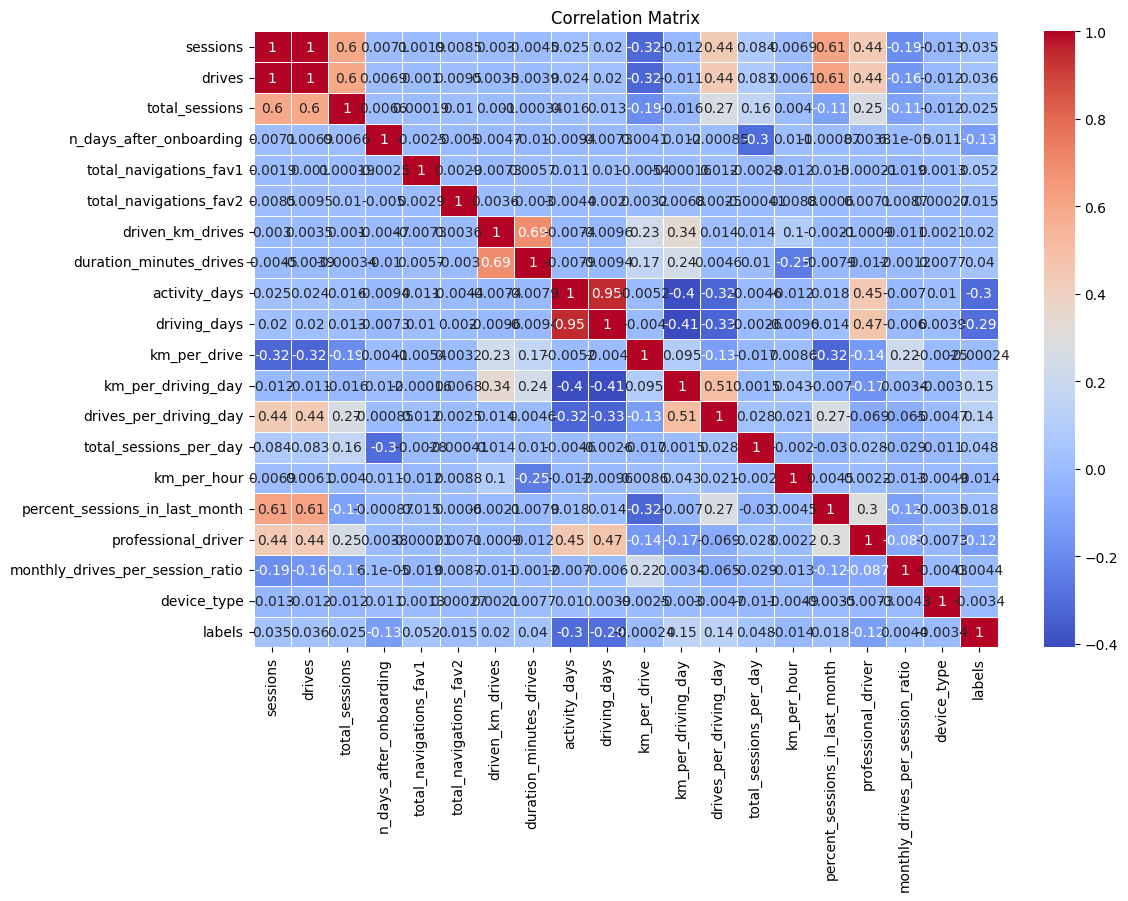

In [80]:
plt.figure(figsize=(12, 8))
corr_matrix = train.drop(['ID','label','device'],axis=1).corr(method="pearson", numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


If there are predictor variables that have a Pearson correlation coefficient value greater than the absolute value of 0.7, these variables are considered strongly multicollinear. Therefore, only one of these variables should be used in the model.

Note: 0.7 is an arbitrary threshold. Some industries may use 0.6, 0.8, etc.

Question: Which variables are multicollinear with each other?

"sessions" and "drives": 1.0

"driving_days" and "activity_days": 0.95

# Regression modeling

To build your model you need to determine what X variables you want to include in your model to predict your target—label2.

Drop the following variables and assign the results to X:

* label (this is the target)
* labels (this is the target)
* device (this is the non-binary-encoded categorical variable)
* sessions (this had high multicollinearity)
* driving_days (this had high multicollinearity)

Note: Notice that sessions and driving_days were selected to be dropped, rather than drives and activity_days. The reason for this is that the features that were kept for modeling had slightly stronger correlations with the target variable than the features that were dropped.

In [81]:
train.isnull().sum()

ID                                  0
label                               0
sessions                            0
drives                              0
total_sessions                      0
n_days_after_onboarding             0
total_navigations_fav1              0
total_navigations_fav2              0
driven_km_drives                    0
duration_minutes_drives             0
activity_days                       0
driving_days                        0
device                              0
km_per_drive                        0
km_per_driving_day                  0
drives_per_driving_day              0
total_sessions_per_day              0
km_per_hour                         0
percent_sessions_in_last_month      0
professional_driver                 0
monthly_drives_per_session_ratio    0
device_type                         0
labels                              0
dtype: int64

In [42]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [82]:
X = train.drop(columns=['ID',"label", "labels", "device", "sessions", "driving_days"])
y = train["labels"]


In [87]:
# Perform the train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [89]:
scaler=StandardScaler()
scaler.fit(x_train)
X_train=scaler.transform(x_train)
X_test=scaler.transform(x_test)

In [92]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [94]:
pd.Series(model.coef_[0], index=X.columns)


drives                              0.125726
total_sessions                      0.052086
n_days_after_onboarding            -0.399410
total_navigations_fav1              0.157246
total_navigations_fav2              0.036921
driven_km_drives                   -0.045679
duration_minutes_drives             0.135766
activity_days                      -0.948202
km_per_drive                        0.064551
km_per_driving_day                  0.025559
drives_per_driving_day             -0.012085
total_sessions_per_day              0.015426
km_per_hour                         0.001930
percent_sessions_in_last_month      0.015225
professional_driver                -0.010611
monthly_drives_per_session_ratio    0.023632
device_type                        -0.007637
dtype: float64

In [95]:
model.intercept_


array([-1.86613475])

In [ ]:

# Get the predicted probabilities of the training data
training_probabilities = model.predict_proba(X_train)
training_probabilities

array([[0.93958806, 0.06041194],
       [0.58057233, 0.41942767],
       [0.76886376, 0.23113624],
       ...,
       [0.91834782, 0.08165218],
       [0.85225508, 0.14774492],
       [0.9326961 , 0.0673039 ]])

In [120]:
# 1. Copy the `X_train` dataframe and assign to `logit_data`
logit_data = x_train.copy()

# 2. Create a new `logit` column in the `logit_data` df
logit_data['logit'] = [np.log1p(prob[1] / prob[0]) for prob in training_probabilities]

Text(0.5, 1.0, 'Log-odds: activity_days')

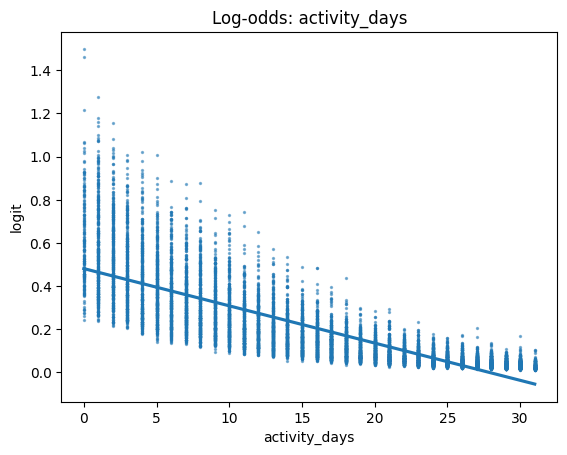

In [121]:
# Plot regplot of `activity_days` log-odds
sns.regplot(x="activity_days", y="logit", data=logit_data, scatter_kws={"s": 2, "alpha": 0.5})
plt.title("Log-odds: activity_days")

In [122]:
# Generate predictions on X_test
y_preds = model.predict(X_test)

In [125]:
# Score the model (accuracy) on the test data
accuracy_score(y_test,y_preds)

0.8240559440559441

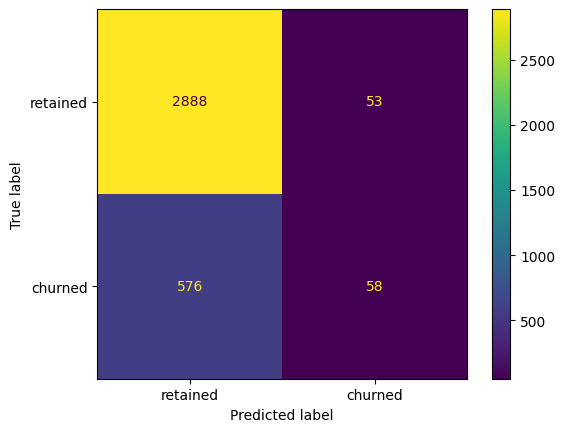

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_preds)

# Create the ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["retained", "churned"])

# Plot the confusion matrix
disp.plot()


In [135]:
# Calculate precision manually
### YOUR confusion_matrixDE HERE ###
precision = cm[1,1] / (cm[0, 1] + cm[1, 1])
precision

0.5225225225225225

In [136]:
# Calculate recall manually
### YOUR CODE HERE ###
recall = cm[1,1] / (cm[1, 0] + cm[1, 1])
recall

0.0914826498422713

In [137]:
# Create a classification report
target_labels = ["retained", "churned"]
print(classification_report(y_test, y_preds, target_names=target_labels))

              precision    recall  f1-score   support

    retained       0.83      0.98      0.90      2941
     churned       0.52      0.09      0.16       634

    accuracy                           0.82      3575
   macro avg       0.68      0.54      0.53      3575
weighted avg       0.78      0.82      0.77      3575



In [139]:
# Create a list of (column_name, coefficient) tuples
importance = list(zip(x_train.columns, abs(model.coef_[0])))

# Sort the list by coefficient value
importance = sorted(importance, key=lambda x: x[1], reverse=True)
importance

[('activity_days', 0.9482019713322889),
 ('n_days_after_onboarding', 0.39940982157027416),
 ('total_navigations_fav1', 0.15724635714271948),
 ('duration_minutes_drives', 0.13576574331771665),
 ('drives', 0.12572586175291553),
 ('km_per_drive', 0.064551424988324),
 ('total_sessions', 0.05208554702878251),
 ('driven_km_drives', 0.04567921321940509),
 ('total_navigations_fav2', 0.036921019680541955),
 ('km_per_driving_day', 0.025558944549634713),
 ('monthly_drives_per_session_ratio', 0.023631535807929375),
 ('total_sessions_per_day', 0.01542550228190538),
 ('percent_sessions_in_last_month', 0.015224684653743117),
 ('drives_per_driving_day', 0.012085174040769673),
 ('professional_driver', 0.010611294019601435),
 ('device_type', 0.007636959751721715),
 ('km_per_hour', 0.0019300444296667537)]

Text(0.5, 1.0, 'Feature importance')

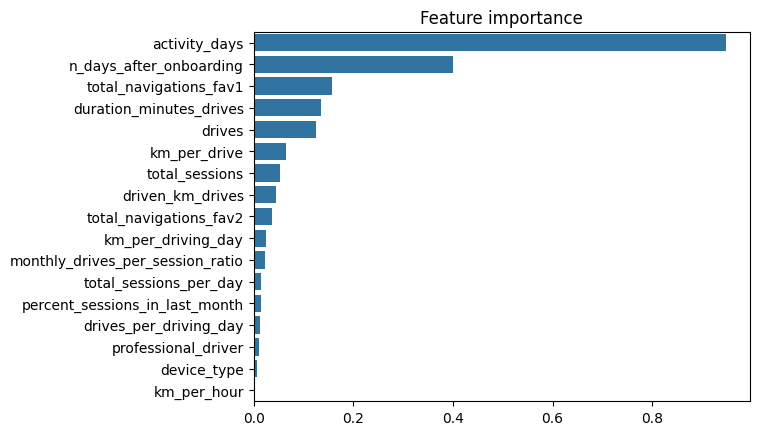

In [140]:
# Plot the feature importances
sns.barplot(x=[x[1] for x in importance],
            y=[x[0] for x in importance],
            orient='h')
plt.title("Feature importance")

# Build a machine learning model

In [141]:
# Import packages for data modeling
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# This is the function that helps plot feature importance
from xgboost import plot_importance

# This module lets us save our models once we fit them.
import pickle

Split the data 80/20 into an interim training set and a test set. Don't forget to stratify the splits, and set the random state to 42.

Split the interim training set 75/25 into a training set and a validation set, yielding a final ratio of 60/20/20 for training/validation/test sets. Again, don't forget to stratify the splits and set the random state.

In [142]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, stratify=y,
                                              test_size=0.2, random_state=42)

# 4. Split into train and validate sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, stratify=y_tr,
                                                  test_size=0.25, random_state=42)

In [143]:
for x in [X_train, X_val, X_test]:
    print(len(x))

8579
2860
2860


In [144]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [None],
             'max_features': [1.0],
             'max_samples': [1.0],
             'min_samples_leaf': [2],
             'min_samples_split': [2],
             'n_estimators': [300],
             }

# 3. Define a dictionary of scoring metrics to capture
scoring = ['accuracy','precision','recall','f1']

# 4. Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='recall')

In [145]:
%%time
rf_cv.fit(X_train, y_train)

CPU times: total: 3min 27s
Wall time: 3min 47s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [1.0], 'min_samples_leaf': [2],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [146]:
# Examine best score
rf_cv.best_score_

0.11693258737394668

In [147]:
# Examine best hyperparameter combo
rf_cv.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [148]:
def make_results(model_name, model_object, metric):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                   }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          },
                         )

    return table

In [149]:
results = make_results('RF cv', rf_cv, 'recall')
results

,model,precision,recall,F1,accuracy
0,RF cv,0.433293,0.116933,0.184143,0.816295


* XGBoost


In [150]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [6, 12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300]
             }

# 3. Define a dictionary of scoring metrics to capture
scoring = ['accuracy','precision','recall','f1']

# 4. Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='recall')

In [151]:
%%time
xgb_cv.fit(X_train, y_train)

CPU times: total: 4min 36s
Wall time: 1min 53s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [6, 12],
                         'min_child_weight': [3, 5], 'n_estimators': [300]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [152]:
# Examine best score
xgb_cv.best_score_

0.16293686973338858

In [153]:

# Examine best parameters
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 12,
 'min_child_weight': 5,
 'n_estimators': 300}

In [154]:
# Call 'make_results()' on the GridSearch object
xgb_cv_results = make_results('XGB cv', xgb_cv, 'recall')
results = pd.concat([results, xgb_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.433293,0.116933,0.184143,0.816295
0,XGB cv,0.398188,0.162937,0.231246,0.807786


* Random forest


In [155]:
# Use random forest model to predict on validation data
rf_val_preds = rf_cv.best_estimator_.predict(X_val)

In [156]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                          })

    return table

In [157]:
# Get validation scores for RF model
rf_val_scores = get_test_scores('RF val', rf_val_preds, y_val)

# Append to the results table
results = pd.concat([results, rf_val_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.433293,0.116933,0.184143,0.816295
0,XGB cv,0.398188,0.162937,0.231246,0.807786
0,RF val,0.432836,0.114398,0.180967,0.816434


* XGBoost


In [158]:
# Use XGBoost model to predict on validation data
xgb_val_preds = xgb_cv.best_estimator_.predict(X_val)

# Get validation scores for XGBoost model
xgb_val_scores = get_test_scores('XGB val', xgb_val_preds, y_val)

# Append to the results table
results = pd.concat([results, xgb_val_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.433293,0.116933,0.184143,0.816295
0,XGB cv,0.398188,0.162937,0.231246,0.807786
0,RF val,0.432836,0.114398,0.180967,0.816434
0,XGB val,0.395652,0.179487,0.246947,0.805944


In [159]:
# Use XGBoost model to predict on test data
xgb_test_preds = xgb_cv.best_estimator_.predict(X_test)

# Get test scores for XGBoost model
xgb_test_scores = get_test_scores('XGB test', xgb_test_preds, y_test)

# Append to the results table
results = pd.concat([results, xgb_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.433293,0.116933,0.184143,0.816295
0,XGB cv,0.398188,0.162937,0.231246,0.807786
0,RF val,0.432836,0.114398,0.180967,0.816434
0,XGB val,0.395652,0.179487,0.246947,0.805944
0,XGB test,0.414097,0.185404,0.256131,0.809091


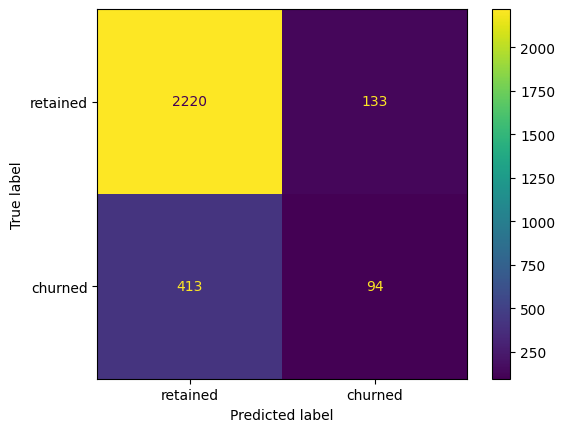

In [160]:
cm = confusion_matrix(y_test, xgb_test_preds, labels=xgb_cv.classes_)
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['retained', 'churned'])
disp.plot()

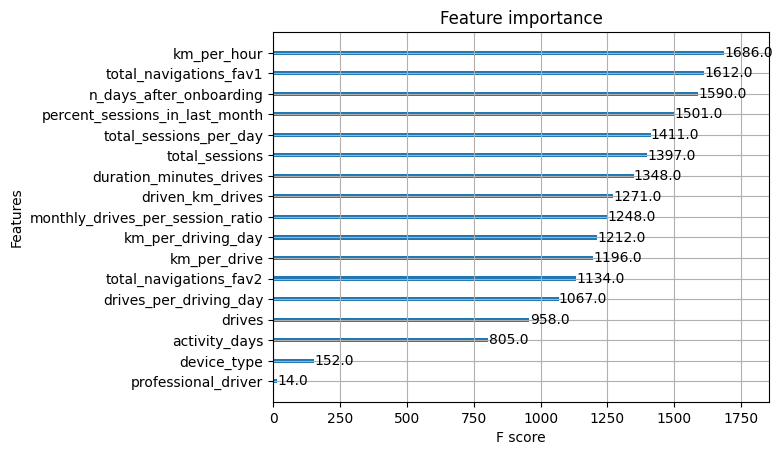

In [161]:
plot_importance(xgb_cv.best_estimator_);


# Conclusion

Questions:

Would you recommend using this model for churn prediction? Why or why not? 
* It depends on the intended use. If the model is to drive significant business decisions, then no, it is not strong enough given its poor recall score. However, if it is used to guide further exploratory efforts, then it has some value.

What tradeoff was made by splitting the data into training, validation, and test sets as opposed to just training and test sets? 
* Splitting the data three ways results in less data available to train the model compared to splitting it two ways. However, using a separate validation set for model selection allows testing the chosen model independently on the test set, providing a better estimate of future performance than using just training and test sets.

What is the benefit of using a logistic regression model over an ensemble of tree-based models (like random forest or XGBoost) for classification tasks? 
* Logistic regression models are easier to interpret. They assign coefficients to predictor variables, revealing which features were most influential in the final predictions and whether they are positively or negatively correlated with the target.

What is the benefit of using an ensemble of tree-based models like random forest or XGBoost over a logistic regression model for classification tasks? 
* Tree-based model ensembles often offer better predictive performance. If predictive accuracy is the priority, tree-based models generally outperform logistic regression. They also require less data cleaning and make fewer assumptions about the distribution of predictor variables.

What could you do to improve this model? 
* New features could be engineered to provide better predictive signals, particularly if you have domain knowledge. In this model, engineered features made up more than half of the top 10 most predictive features. Additionally, reconstructing the model with different combinations of predictor variables might reduce noise from irrelevant features.

What additional features would you like to have to help improve the model? 
* Drive-level information for each user (such as drive times, geographic locations, etc.) would be helpful. More granular data on how users interact with the app, such as the frequency of reporting or confirming road hazard alerts, would also be beneficial. Finally, knowing the monthly count of unique starting and ending locations for each driver would provide valuable insights.